_Lambda School Data Science, Classification 1_

This sprint, your project is about water pumps in Tanzania. Can you predict which water pumps are faulty?

# Logistic Regression, One-Hot Encoding

#### Objectives
- begin with baselines for classification
- use classification metric: accuracy
- do train/validate/test split
- use scikit-learn for logistic regression
- submit to predictive modeling competitions

## Get ready

### Get started on Kaggle
1. [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. 
2. Go to our Kaggle InClass competition website. You will be given the URL in Slack.
3. Go to the Rules page. Accept the rules of the competition.

### Install [category_encoders](http://contrib.scikit-learn.org/categorical-encoding/) (version 2+)
- Local Anaconda: `conda install -c conda-forge category_encoders`
- Google Colab: `pip install category_encoders`

### Install [pandas-profiling](https://github.com/pandas-profiling/pandas-profiling) (version 2+)
- `pip install --update pandas-profiling`

## Get data

### Option 1. Github

Get data from our [GitHub repo](https://github.com/LambdaSchool/DS-Unit-2-Linear-Models/tree/master/data/tanzania).
- [train_features.csv](https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/train_features.csv)
- [train_labels.csv](https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/train_labels.csv)
- [test_features.csv](https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/test_features.csv)
- [sample_submission.csv](https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/sample_submission.csv)


### Option 2. Kaggle web UI
 
Go to our Kaggle InClass competition webpage. Go to the Data page. After you have accepted the rules of the competition, use the download buttons to download the data.


### Option 3. Kaggle API

1. [Follow these instructions](https://github.com/Kaggle/kaggle-api#api-credentials) to create a Kaggle “API Token” and download your `kaggle.json` file.

2. Put `kaggle.json` in the correct location.

  - If you're using Anaconda, put the file in the directory specified in the [instructions](https://github.com/Kaggle/kaggle-api#api-credentials).

  - If you're using Google Colab, upload the file to your Google Drive, and run this cell:

  ```
  from google.colab import drive
  drive.mount('/content/drive')
  %env KAGGLE_CONFIG_DIR=/content/drive/My Drive/
  ```

3. Install the Kaggle API package.
```
pip install kaggle
```

4. After you have accepted the rules of the competiton, use the Kaggle API package to get the data.
```
kaggle competitions download -c COMPETITION-NAME
```


## Read data
 - `train_features.csv` : the training set features
 - `train_labels.csv` : the training set labels
 - `test_features.csv` : the test set features
 - `sample_submission.csv` :  a sample submission file in the correct format

In [0]:
import pandas as pd

LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/'

train_features = pd.read_csv(WEB + 'train_features.csv')
train_labels = pd.read_csv(WEB + 'train_labels.csv')
test_features = pd.read_csv(WEB + 'test_features.csv')
sample_submission = pd.read_csv(WEB + 'sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [82]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [83]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [84]:
test_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [85]:
sample_submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,functional
4,49871,functional


### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

## Why doesn't Kaggle give you labels for the test set?

#### Rachel Thomas, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)

> One great thing about Kaggle competitions is that they force you to think about validation sets more rigorously (in order to do well). For those who are new to Kaggle, it is a platform that hosts machine learning competitions. Kaggle typically breaks the data into two sets you can download:

> 1. a **training set**, which includes the _independent variables_, as well as the _dependent variable_ (what you are trying to predict).

> 2. a **test set**, which just has the _independent variables_. You will make predictions for the test set, which you can submit to Kaggle and get back a score of how well you did.

> This is the basic idea needed to get started with machine learning, but to do well, there is a bit more complexity to understand. You will want to create your own training and validation sets (by splitting the Kaggle “training” data). You will just use your smaller training set (a subset of Kaggle’s training data) for building your model, and you can evaluate it on your validation set (also a subset of Kaggle’s training data) before you submit to Kaggle.

> The most important reason for this is that Kaggle has split the test data into two sets: for the public and private leaderboards. The score you see on the public leaderboard is just for a subset of your predictions (and you don’t know which subset!). How your predictions fare on the private leaderboard won’t be revealed until the end of the competition. The reason this is important is that you could end up overfitting to the public leaderboard and you wouldn’t realize it until the very end when you did poorly on the private leaderboard. Using a good validation set can prevent this. You can check if your validation set is any good by seeing if your model has similar scores on it to compared with on the Kaggle test set. ...

> Understanding these distinctions is not just useful for Kaggle. In any predictive machine learning project, you want your model to be able to perform well on new data.

## Why hold out an independent test set?

#### Owen Zhang, [Winning Data Science Competitions](https://www.slideshare.net/OwenZhang2/tips-for-data-science-competitions)

> There are many ways to overfit. Beware of "multiple comparison fallacy." There is a cost in "peeking at the answer."

> Good validation is _more important_ than good models. Simple training/validation split is _not_ enough. When you looked at your validation result for the Nth time, you are training models on it.

> If possible, have "holdout" dataset that you do not touch at all during model build process. This includes feature extraction, etc.

> What if holdout result is bad? Be brave and scrap the project.

#### Hastie, Tibshirani, and Friedman, [The Elements of Statistical Learning](http://statweb.stanford.edu/~tibs/ElemStatLearn/), Chapter 7: Model Assessment and Selection

> If we are in a data-rich situation, the best approach is to randomly divide the dataset into three parts: a training set, a validation set, and a test set. The training set is used to fit the models; the validation set is used to estimate prediction error for model selection; the test set is used for assessment of the generalization error of the final chosen model. Ideally, the test set should be kept in a "vault," and be brought out only at the end of the data analysis. Suppose instead that we use the test-set repeatedly, choosing the model with the smallest test-set error. Then the test set error of the final chosen model will underestimate the true test error, sometimes substantially.

#### Andreas Mueller and Sarah Guido, [Introduction to Machine Learning with Python](https://books.google.com/books?id=1-4lDQAAQBAJ&pg=PA270)

> The distinction between the training set, validation set, and test set is fundamentally important to applying machine learning methods in practice. Any choices made based on the test set accuracy "leak" information from the test set into the model. Therefore, it is important to keep a separate test set, which is only used for the final evaluation. It is good practice to do all exploratory analysis and model selection using the combination of a training and a validation set, and reserve the test set for a final evaluation - this is even true for exploratory visualization. Strictly speaking, evaluating more than one model on the test set and choosing the better of the two will result in an overly optimistic estimate of how accurate the model is.

#### Hadley Wickham, [R for Data Science](https://r4ds.had.co.nz/model-intro.html#hypothesis-generation-vs.hypothesis-confirmation)

> There is a pair of ideas that you must understand in order to do inference correctly:

> 1. Each observation can either be used for exploration or confirmation, not both.

> 2. You can use an observation as many times as you like for exploration, but you can only use it once for confirmation. As soon as you use an observation twice, you’ve switched from confirmation to exploration.

> This is necessary because to confirm a hypothesis you must use data independent of the data that you used to generate the hypothesis. Otherwise you will be over optimistic. There is absolutely nothing wrong with exploration, but you should never sell an exploratory analysis as a confirmatory analysis because it is fundamentally misleading.

> If you are serious about doing an confirmatory analysis, one approach is to split your data into three pieces before you begin the analysis.

## Begin with baselines for classification

### Get majority class baseline

[Will Koehrsen](https://twitter.com/koehrsen_will/status/1088863527778111488)

> A baseline for classification can be the most common class in the training dataset.

[*Data Science for Business*](https://books.google.com/books?id=4ZctAAAAQBAJ&pg=PT276), Chapter 7.3: Evaluation, Baseline Performance, and Implications for Investments in Data

> For classification tasks, one good baseline is the _majority classifier_, a naive classifier that always chooses the majority class of the training dataset (see Note: Base rate in Holdout Data and Fitting Graphs). This may seem like advice so obvious it can be passed over quickly, but it is worth spending an extra moment here. There are many cases where smart, analytical people have been tripped up in skipping over this basic comparison. For example, an analyst may see a classification accuracy of 94% from her classifier and conclude that it is doing fairly well—when in fact only 6% of the instances are positive. So, the simple majority prediction classifier also would have an accuracy of 94%. 

#### Determine majority class

In [86]:
y_train = train_labels['status_group']
y_train.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

#### What if we guessed the majority class for every prediction?

In [87]:
y_train.mode()[0]

'functional'

In [0]:
majority_class = y_train.mode()[0]
y_pred = [majority_class]*len(y_train)

In [89]:
y_pred[:5]

['functional', 'functional', 'functional', 'functional', 'functional']

## Use classification metric: accuracy

#### [_Classification metrics are different from regression metrics!_](https://scikit-learn.org/stable/modules/model_evaluation.html)
- Don't use _regression_ metrics to evaluate _classification_ tasks.
- Don't use _classification_ metrics to evaluate _regression_ tasks.

[Accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score) is a common metric for classification. Accuracy is the ["proportion of correct classifications"](https://en.wikipedia.org/wiki/Confusion_matrix): the number of correct predictions divided by the total number of predictions.

#### What is the baseline accuracy if we guessed the majority class for every prediction?

In [90]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_pred)

0.543080808080808

## Do train/validate/test split

#### Rachel Thomas, [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)

> You will want to create your own training and validation sets (by splitting the Kaggle “training” data). You will just use your smaller training set (a subset of Kaggle’s training data) for building your model, and you can evaluate it on your validation set (also a subset of Kaggle’s training data) before you submit to Kaggle.

#### Sebastian Raschka, [Model Evaluation](https://sebastianraschka.com/blog/2018/model-evaluation-selection-part4.html)

> Since “a picture is worth a thousand words,” I want to conclude with a figure (shown below) that summarizes my personal recommendations ...

<img src="https://sebastianraschka.com/images/blog/2018/model-evaluation-selection-part4/model-eval-conclusions.jpg" width="600">



Usually, we want to do **"Model selection (hyperparameter optimization) _and_ performance estimation."**

Therefore, we use **"3-way holdout method (train/validation/test split)"** or we use **"cross-validation with independent test set."**

#### We have two options for where we choose to split:
- Time
- Random

To split on time, we can use pandas.

To split randomly, we can use the [**`sklearn.model_selection.train_test_split`**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.

In [91]:
train_features.shape

(59400, 40)

In [92]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=None)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_s

In [0]:
# Split your training data. Default split is 75-25 %
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

# Straify option is there to make sure the split tries to maintain the distribution 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42, stratify=y_train)


In [94]:
#We just split train_features into X_train and X_val
X_train.shape, X_val.shape, train_features.shape

((44550, 40), (14850, 40), (59400, 40))

In [95]:
y_train.value_counts(normalize=True)

functional                 0.543075
non functional             0.384242
functional needs repair    0.072682
Name: status_group, dtype: float64

In [96]:
y_val.value_counts(normalize=True)

functional                 0.543098
non functional             0.384242
functional needs repair    0.072660
Name: status_group, dtype: float64

## Use scikit-learn for logistic regression
- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- Wikipedia, [Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression)

### Begin with baselines: fast, first models

#### Drop non-numeric features

In [0]:
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

In [98]:
X_train.shape, X_train_numeric.shape #only 10 numeric features

((44550, 40), (44550, 10))

#### Drop nulls if necessary

In [99]:
X_train_numeric.isnull().sum()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

#### Fit Logistic Regresson on train data

In [100]:
from sklearn.linear_model import LogisticRegression

#Be sure to use a larger max_iter than default
model = LogisticRegression(solver='lbfgs', multi_class ='auto', max_iter=10000)
model.fit(X_train_numeric, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluate on validation data

In [0]:
y_pred = model.predict(X_val_numeric)

In [111]:
y_pred

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype=object)

In [102]:
accuracy_score(y_val,y_pred)

0.5519191919191919

0.5519191919191919

In [0]:
#Hmm... hardly any better (only1% improvement)
# apparently, the numberic features don't improve prediction better than our initial baseline

#### What predictions does a Logistic Regression return?

In [104]:
pd.Series(y_pred).value_counts()
#Notice, no "functional but needs fixing" as prediciton

functional        13502
non functional     1348
dtype: int64

functional        13502
non functional     1348
dtype: int64

## Do one-hot encoding of categorical features

### Check "cardinality" of categorical features

[Cardinality](https://simple.wikipedia.org/wiki/Cardinality) means the number of unique values that a feature has:
> In mathematics, the cardinality of a set means the number of its elements. For example, the set A = {2, 4, 6} contains 3 elements, and therefore A has a cardinality of 3. 

One-hot encoding adds a dimension for each unique value of each categorical feature. So, it may not be a good choice for "high cardinality" categoricals that have dozens, hundreds, or thousands of unique values. 

In [105]:
X_train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,44550,1,GeoData Consultants Ltd,44550
public_meeting,42082,2,True,38275
permit,42257,2,True,29099
source_class,44550,3,groundwater,34365
management_group,44550,5,user-group,39428
quantity_group,44550,5,enough,24909
quantity,44550,5,enough,24909
waterpoint_type_group,44550,6,communal standpipe,25910
quality_group,44550,6,good,38044
payment_type,44550,7,never pay,19035


,count,unique,top,freq
recorded_by,44550,1,GeoData Consultants Ltd,44550
public_meeting,42082,2,True,38275
permit,42257,2,True,29099
source_class,44550,3,groundwater,34365
management_group,44550,5,user-group,39428
quantity_group,44550,5,enough,24909
quantity,44550,5,enough,24909
waterpoint_type_group,44550,6,communal standpipe,25910
quality_group,44550,6,good,38044
payment_type,44550,7,never pay,19035


### Explore `quantity` feature

In [106]:
X_train['quantity'].value_counts(dropna=False)

enough          24909
insufficient    11376
dry              4628
seasonal         3039
unknown           598
Name: quantity, dtype: int64

enough          24909
insufficient    11376
dry              4628
seasonal         3039
unknown           598
Name: quantity, dtype: int64

### Encode `quantity` feature

In [107]:
 !pip install category_encoders

In [0]:
import category_encoders as ce

In [0]:
encoder = ce.OneHotEncoder(use_cat_names=True)
encoded = encoder.fit_transform(X_train['quantity'])


In [110]:
encoded.sample(10)

,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_dry,quantity_unknown
15959,0,1,0,0,0
21704,0,1,0,0,0
16173,0,0,1,0,0
4536,1,0,0,0,0
21897,1,0,0,0,0
5292,1,0,0,0,0
4078,0,1,0,0,0
5630,0,1,0,0,0
52811,1,0,0,0,0
56774,0,1,0,0,0


,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_dry,quantity_unknown
15297,1,0,0,0,0
45559,0,0,0,1,0
52611,0,1,0,0,0
51771,1,0,0,0,0
3960,1,0,0,0,0
47481,0,1,0,0,0
13519,0,1,0,0,0
32105,0,1,0,0,0
9363,1,0,0,0,0
32589,0,1,0,0,0


## Do one-hot encoding & Scale features, 
within a complete model fitting workflow.

### Why and how to scale features before fitting linear models

Scikit-Learn User Guide, [Preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html)
> Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

> The `preprocessing` module further provides a utility class `StandardScaler` that implements the `Transformer` API to compute the mean and standard deviation on a training set. The scaler instance can then be used on new data to transform it the same way it did on the training set.

### How to use encoders and scalers in scikit-learn
- Use the **`fit_transform`** method on the **train** set
- Use the **`transform`** method on the **validation** set


In [112]:
#First case - no scaling on categorical/encoded features
from sklearn.preprocessing import StandardScaler

categorical_features = ['quantity']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

#notice scaling only done to numeric features
scaler = StandardScaler()
X_train_subset[numeric_features] = scaler.fit_transform(X_train_subset[numeric_features])
X_val_subset[numeric_features] = scaler.transform(X_val_subset[numeric_features])

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_encoded, y_train)
print('Validation Accuracy', model.score(X_val_encoded, y_val))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

Validation Accuracy 0.6556228956228957


In [113]:
#2nd method - encode first, scale everything. Turns out the Validation accuracy
# is the same. 
categorical_features = ['quantity']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_subset = X_train[features]
X_val_subset = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_subset)
X_val_encoded = encoder.transform(X_val_subset)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

Validation Accuracy 0.6556228956228957


### Compare original features, encoded features, & scaled features

In [114]:
X_train[:1]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
35240,28252,200.0,2011-03-09,NaN,1757,Angli,34.58874,-9.786994,none,0,Lake Nyasa,Kiyombo,Iringa,11,5,Ludewa,Mlangali,75,True,GeoData Consultants Ltd,VWC,Anglic,False,2001,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [116]:
X_train_numeric[:1]

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
35240,28252,200.0,1757,34.58874,-9.786994,0,11,5,75,2001


In [117]:
X_train_encoded[:1]

,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_dry,quantity_unknown,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
35240,1,0,0,0,0,200.0,1757,34.58874,-9.786994,0,11,5,75,2001


In [118]:
X_train_scaled[:1]

array([[ 0.88798096, -0.58559299, -0.27057256, -0.34047916, -0.1166437 ,
        -0.03806493,  1.56900669,  0.07752458, -1.38406357, -0.03545445,
        -0.24241629, -0.06327462, -0.2264897 ,  0.73482189]])

### Get & plot coefficients

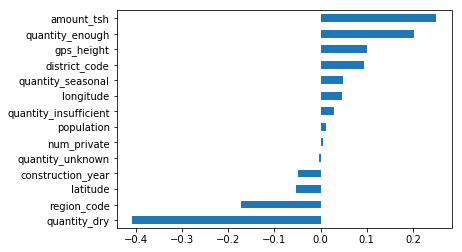

In [119]:
%matplotlib inline

import matplotlib.pyplot as plt

coefs = pd.Series(model.coef_[0], X_train_encoded.columns)
coefs.sort_values().plot.barh()

## Submit to predictive modeling competition


### Write submission CSV file

The format for the submission file is simply the row id and the predicted label (for an example, see `sample_submission.csv` on the data download page.

For example, if you just predicted that all the waterpoints were functional you would have the following predictions:

<pre>id,status_group
50785,functional
51630,functional
17168,functional
45559,functional
49871,functional
</pre>

Your code to generate a submission file may look like this: 
<pre># estimator is your scikit-learn estimator, which you've fit on X_train

# X_test is your pandas dataframe or numpy array, 
# with the same number of rows, in the same order, as test_features.csv, 
# and the same number of columns, in the same order, as X_train

y_pred = estimator.predict(X_test)


# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
</pre>

### Send submission CSV file to Kaggle

#### Option 1. Kaggle web UI
 
Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file.


#### Option 2. Kaggle API

Use the Kaggle API to upload your CSV file.

# Assignment
- Learn about the mathematics of Logistic Regression by watching Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes).
- Start a clean notebook.
- Do train/validate/test split with the Tanzania Waterpumps data.
- Begin to explore and clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- Select different numeric and categorical features. 
- Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- Scale features.
- Use scikit-learn for logistic regression.
- Get your validation accuracy score.
- Get and plot your coefficients.
- Submit your predictions to our Kaggle competition.
- Commit your notebook to your fork of the GitHub repo.

## Stretch Goals
- Begin to visualize the data.
- Try different [scikit-learn scalers](https://scikit-learn.org/stable/modules/preprocessing.html)
- Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html):

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:

> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.
